In [59]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [60]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [61]:
query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, connect, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [62]:
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

commits['weekday'] = commits['timestamp'].apply(lambda x: days[x.dayofweek])
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)
commits

,uid,weekday,hour
0,user_4,Fri,5
1,user_4,Fri,5
2,user_4,Fri,5
3,user_4,Fri,5
4,user_4,Fri,5
...,...,...,...
3202,user_1,Thu,20
3203,user_1,Thu,20
3204,user_1,Thu,20
3205,user_1,Thu,20


In [63]:
columns = commits.groupby('uid').count().sort_values('hour', ascending=False).index
columns

Index(['user_4', 'user_14', 'user_2', 'user_25', 'user_19', 'user_26',
       'user_20', 'user_31', 'user_10', 'user_3', 'user_29', 'user_13',
       'user_28', 'user_24', 'user_12', 'user_8', 'user_1', 'user_21',
       'user_30', 'user_18', 'user_17', 'user_16', 'user_27', 'user_15',
       'user_6', 'user_7', 'user_22', 'user_11', 'user_23', 'user_0'],
      dtype='object', name='uid')

In [64]:
df_1 = commits.groupby('uid').weekday.value_counts().unstack(0) # unstack переворачивает таблицу
df_1 = df_1.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # отсортируем дни по порядку
df_1 = df_1.reindex(columns=columns)# отсортируем юзеров по уменьшению коммитов согласно нашего подготовленного списка
df_1 = df_1.fillna(0) # пустые значения заполним нулем
df_1

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,2.0,0.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,0.0,1.0,8.0,0.0,0.0


In [65]:
index = pd.RangeIndex(stop=24)

In [66]:
df_2 = commits.groupby('uid').hour.value_counts().unstack(0)
df_2 = df_2.reindex(index=index, fill_value=0)
df_2 = df_2.reindex(columns=columns)
df_2 = df_2.rename_axis('hour')
df_2 = df_2.fillna(0)
df_2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


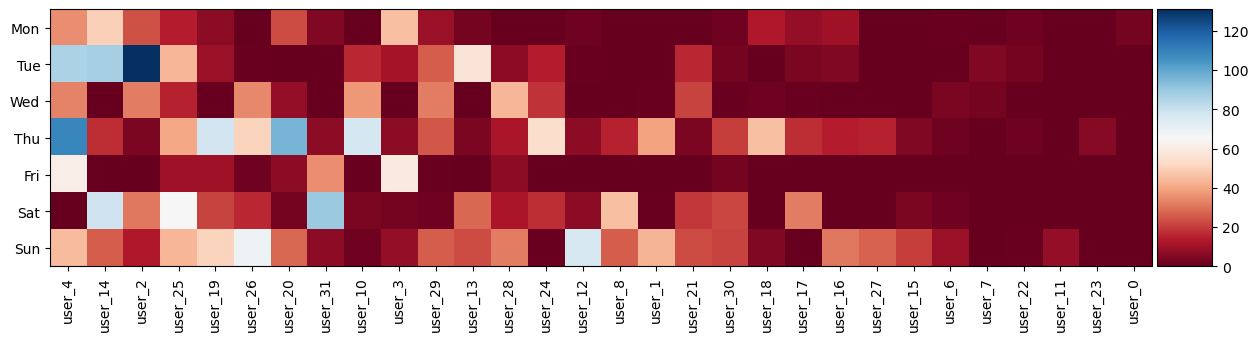

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(df_1, cmap='RdBu') # imshow расположение координат
divider = make_axes_locatable(ax) # колонка градиента для закраски
cax = divider.append_axes('right', size='5%', pad=0.05) # ее расположение, иразмер и градация
plt.colorbar(im, cax=cax) # эту же цветовую градацию используем для графика
ax.set_xticks(range(df_1.shape[1])) # определяем, какие значения на каких осях
ax.set_yticks(range(df_1.shape[0]))
ax.set_xticklabels(df_1.columns) # определяем, как подписаны оси
ax.set_yticklabels(df_1.index)
plt.setp(ax.get_xticklabels(), rotation=90) # поворачиваем подписи на оси х на 90 градусов
plt.show()

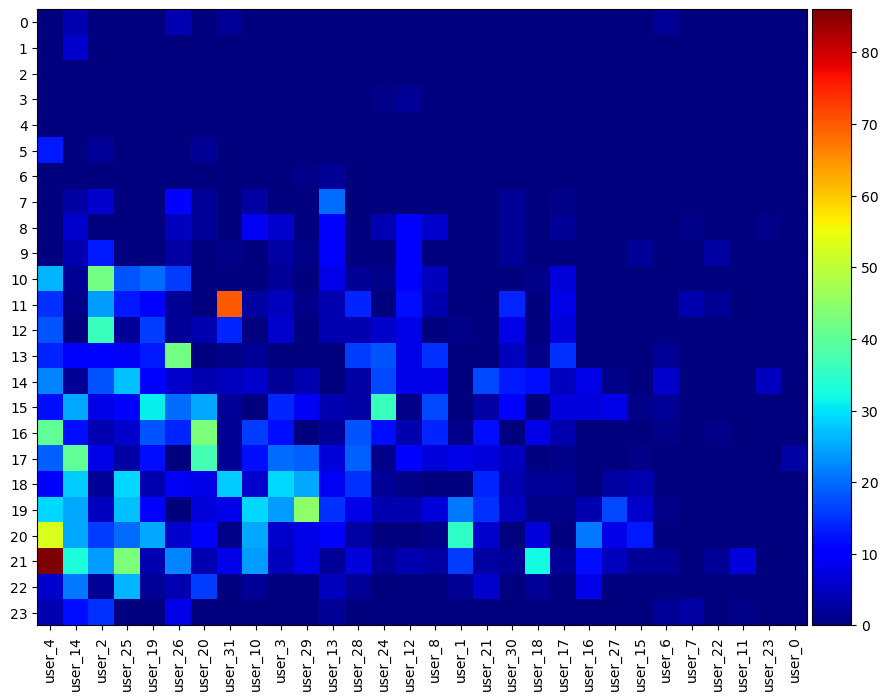

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(df_2, cmap='jet') # imshow расположение координат
divider = make_axes_locatable(ax) # колонка градиента для закраски
cax = divider.append_axes('right', size='5%', pad=0.05) # ее расположение, иразмер и градация
plt.colorbar(im, cax=cax) # эту же цветовую градацию используем для графика
ax.set_xticks(range(df_2.shape[1])) # определяем, какие значения на каких осях
ax.set_yticks(range(df_2.shape[0]))
ax.set_xticklabels(df_2.columns) # определяем, как подписаны оси
ax.set_yticklabels(df_2.index)
plt.setp(ax.get_xticklabels(), rotation=90) # поворачиваем подписи на оси х на 90 градусов
plt.show()

#### У какого пользователя больше всего коммитов во вторник?

- Ответ: user_2.

#### У какого пользователя больше всего коммитов в четверг?

- Ответ: user_4.

#### В какой день недели пользователям не нравится делать много коммитов?

- Ответ: в пятницу.

#### Какой пользователь и в какое время сделал наибольшее количество коммитов?

- Ответ: user_4 в 21 час

In [69]:
connect.close()